In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplot
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df_sp_italiano = pd.read_csv("Base-de-dados-tratado/tomates-precos-sp-italiano-AA.csv")
df_sp_italiano.head()

,Unnamed: 0,Produto,Região,Dia,Mês,Ano,Unidade,Preço,Data,Aumento,Aceleracao
0,27352,Italiano - atacado,São Paulo (capital),2,1,2015,Caixa 20 kg,32.00,2015-01-02,NaN,NaN
1,27353,Italiano - atacado,São Paulo (capital),5,1,2015,Caixa 20 kg,40.00,2015-01-05,8.00,NaN
2,27354,Italiano - atacado,São Paulo (capital),6,1,2015,Caixa 20 kg,42.00,2015-01-06,2.00,-6.00
3,27355,Italiano - atacado,São Paulo (capital),7,1,2015,Caixa 20 kg,62.00,2015-01-07,20.00,18.00
4,27356,Italiano - atacado,São Paulo (capital),8,1,2015,Caixa 20 kg,50.63,2015-01-08,-11.37,-31.37


<Axes: xlabel='Data', ylabel='Preço'>

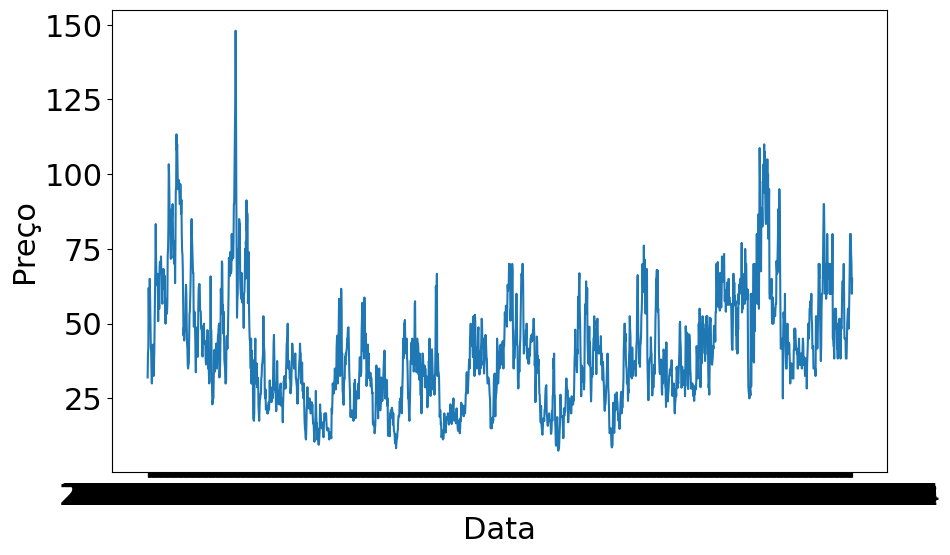

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 22
sns.lineplot(x='Data', y="Preço",data=df_sp_italiano)

In [4]:
sc = StandardScaler()

df_sp_italiano_to_scale = df_sp_italiano[['Data','Preço']]
df_sp_italiano_to_scale['Data'] = pd.to_datetime(df_sp_italiano_to_scale['Data'])
df_sp_italiano_to_scale['Data'] = pd.to_numeric(df_sp_italiano_to_scale['Data'])

sc.fit(df_sp_italiano_to_scale)

<ipython-input-4-8e80cd6b0cd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp_italiano_to_scale['Data'] = pd.to_datetime(df_sp_italiano_to_scale['Data'])
<ipython-input-4-8e80cd6b0cd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp_italiano_to_scale['Data'] = pd.to_numeric(df_sp_italiano_to_scale['Data'])


StandardScaler()

In [5]:
dado_escalado = sc.transform(df_sp_italiano_to_scale)

In [6]:
x = dado_escalado[:,0]
y=dado_escalado[:,1]

Text(0.5, 0, 'Data')

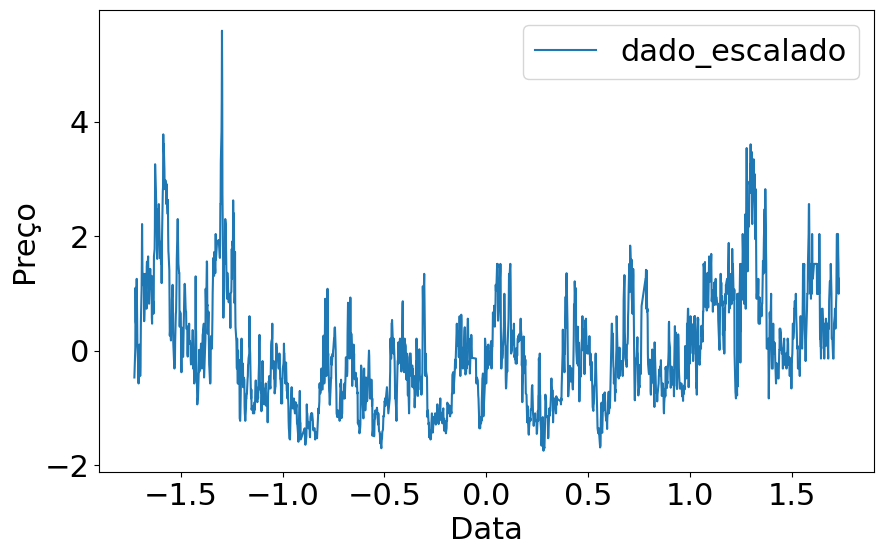

In [7]:
sns.lineplot(x=x,y=y,label='dado_escalado') 
pyplot.ylabel('Preço')
pyplot.xlabel('Data')

In [8]:
tamanho_treino = int(len(df_sp_italiano_to_scale)*0.9)
tamano_teste = len(df_sp_italiano_to_scale) - tamanho_treino

In [9]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

In [10]:
x_teste = x[tamanho_treino:len(df_sp_italiano_to_scale)]
y_teste = y[tamanho_treino:len(df_sp_italiano_to_scale)]

<Axes: >

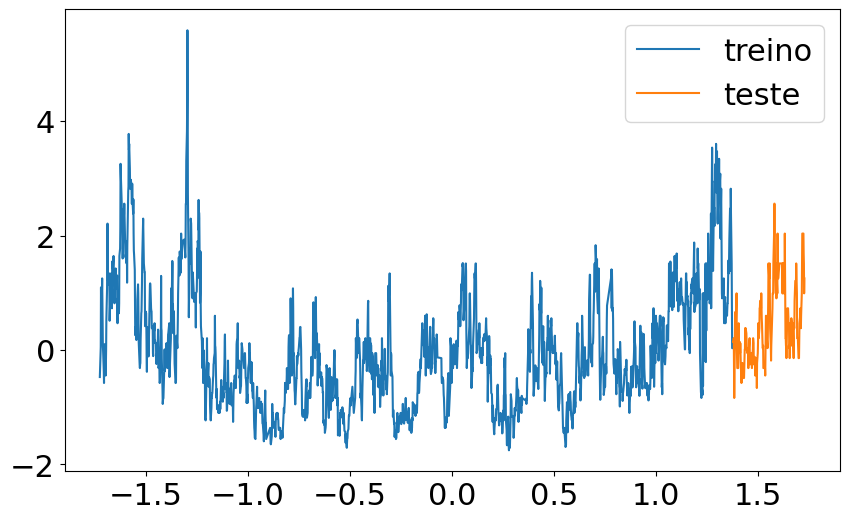

In [11]:
sns.lineplot(x=x_treino,y=y_treino,label='treino')
sns.lineplot(x=x_teste,y=y_teste,label='teste')

In [12]:
regressor = Sequential()

In [13]:
regressor.add(Dense(1, input_dim=1,kernel_initializer="Ones",
                    activation="linear",use_bias=False))

In [14]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [17]:
regressor.fit(x_treino,y_treino)

57/57 [==============================] - 1s 3ms/step - loss: 1.7855


In [18]:
y_predict= regressor.predict(x_treino)

57/57 [==============================] - 0s 1ms/step


<Axes: >

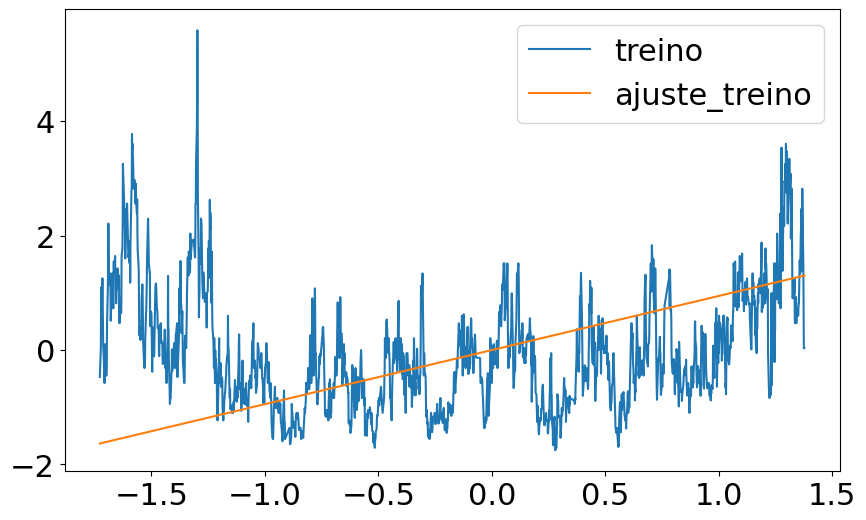

In [19]:
sns.lineplot(x=x_treino,y=y_treino,label='treino')
sns.lineplot(x=x_treino,y=y_predict[:,0],label='ajuste_treino')

In [20]:
d = {'tempo': x_treino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

In [21]:
resultado_transf = sc.inverse_transform(resultados)

In [22]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['Data','Preço']

<Axes: xlabel='Data', ylabel='Preço'>

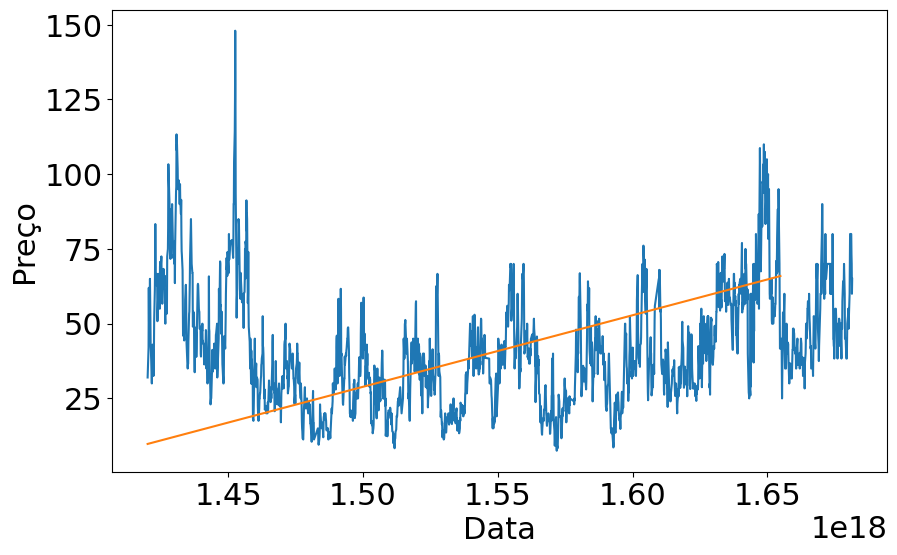

In [25]:
sns.lineplot(x="Data",y="Preço",data=df_sp_italiano_to_scale)
sns.lineplot(x="Data",y="Preço",data=resultado_transf)

In [26]:
y_predict_teste= regressor.predict(x_teste)

7/7 [==============================] - 0s 2ms/step


In [27]:
d = {'Data': x_teste, 'Preço': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [28]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [29]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['Data','Preço']

<Axes: xlabel='Data', ylabel='Preço'>

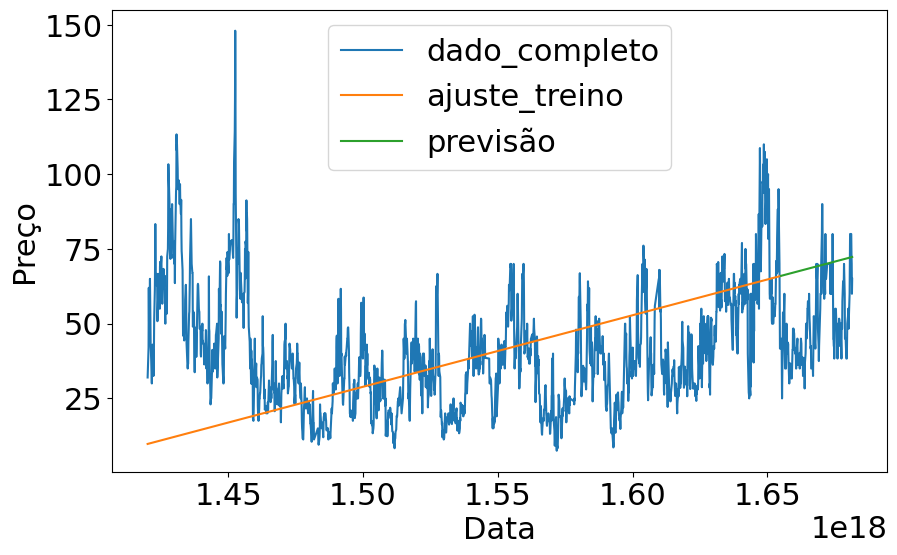

In [30]:
sns.lineplot(x="Data",y="Preço",data=df_sp_italiano_to_scale,label='dado_completo')
sns.lineplot(x="Data",y="Preço",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="Data",y="Preço",data=resultado_transf_teste,label='previsão')